<a href="https://colab.research.google.com/github/adityapanwar94/Data-Analysis-and-Process-Automation-DaPrA-/blob/drishti/Dataset_preprocessing%2C_analysis%2C_correlation_matrix(User_data_only%2C_no_computer_specs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q /content/drive/MyDrive/eYSIP_Data/Dataset-26-06.zip

## **Importing Libraries**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
Grouped_data = pd.read_csv(r'/content/Dataset/Dataset_grouped(25-06-22).csv')
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 159 entries, team_id to Department_category_4.0
dtypes: float64(4), int64(155)
memory usage: 1.6 MB


In [5]:
Grouped_data.describe()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,...,Internet_option_freq_0,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_4.0
count,1293.000000,1286.000000,1292.000000,1292.000000,1184.000000,1293.000000,1293.000000,1293.00000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,1948.748647,21.225626,2.898671,1.962461,63.363176,3.768755,0.008507,0.07966,0.096674,0.015468,...,0.013921,2.730085,0.788863,0.359629,0.094354,0.013148,2.034029,0.948183,0.970611,0.047177
std,560.509233,63.753526,3.185943,2.462263,55.176500,0.827104,0.133152,0.42811,0.593382,0.218514,...,0.188175,1.227522,0.969887,0.735948,0.377880,0.120552,1.697864,1.415179,1.454385,0.369212
min,1001.000000,2.870000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1466.000000,8.363125,1.000000,0.500000,10.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1897.000000,8.902917,2.000000,1.250000,50.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,2457.000000,22.576875,4.000000,2.750000,100.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
max,2971.000000,2105.075000,29.250000,28.500000,200.000000,4.000000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000


In [6]:
Grouped_data.isnull().sum()

team_id                      0
cgpa                         7
onlineCourse                 1
completeCourse               1
internetspeed<             109
                          ... 
Internet_option_freq_5       0
Department_category_0.0      0
Department_category_1.0      0
Department_category_2.0      0
Department_category_4.0      0
Length: 159, dtype: int64

In [7]:
def unique_chart(Dataset):
  uni_dict = {}
  uni_value ={}
  keys = Dataset.columns
  for i in keys:
    uni_dict[i] = Dataset[i].nunique()
    if Dataset[i].nunique() <= 10:
      uni_value[i] = Dataset[i].unique()
    else:
      uni_value[i] = None
  return (uni_dict, uni_value)

In [8]:
uni_dict, uni_value = unique_chart(Grouped_data)
Unique = pd.DataFrame([uni_dict, uni_value]) 
print(Unique.to_markdown())

|    |   team_id |   cgpa |   onlineCourse |   completeCourse | internetspeed<                       | Discipline_0.0   | Discipline_1.0   | Discipline_2.0   | Discipline_3.0   | Discipline_4.0   | Discipline_5.0   | Discipline_7.0   | Year_1.0    | Year_2.0    | Year_3.0    | Year_4.0    | Year_6.0   | Gender_0.0   | Gender_1.0   | Gender_3.0   | elsiLab_0.0   | elsiLab_1.0   | elsiLab_2.0   | ssc_board_0.0   | ssc_board_1.0   | ssc_board_2.0   | ssc_board_3.0   | ssc_board_4.0   | ssc_board_6.0   | hsc_board_0.0   | hsc_board_1.0   | hsc_board_2.0   | hsc_board_3.0   | hsc_board_4.0   | hsc_board_6.0   | workstation_1.0   | workstation_2.0   | workstation_4.0   | sub_ros_0.0   | sub_ros_1.0   | sub_ros_2.0   | sub_ros_3.0   | sub_ros_4.0   | sub_ros_7.0   | sub_ip_0.0   | sub_ip_1.0   | sub_ip_2.0   | sub_ip_3.0   | sub_ip_4.0   | sub_ip_7.0   | sub_emb_c_0.0   | sub_emb_c_1.0   | sub_emb_c_2.0   | sub_emb_c_3.0   | sub_emb_c_4.0   | sub_emb_c_7.0   | sub_ml_0.0   | sub_ml_1.0   | su

In [9]:
columns = ['internetspeed<', 'cgpa', 'onlineCourse', 'completeCourse']
def internet_null_replace(columns):
  for cols in columns:
    Grouped_data[cols] = Grouped_data[cols].fillna(0)
  return Grouped_data

Grouped_data = internet_null_replace(columns)

In [10]:
print(Grouped_data.isna().sum().sort_values(ascending=False).to_markdown())

|                         |   0 |
|:------------------------|----:|
| team_id                 |   0 |
| preference2_4.0         |   0 |
| preference1_4.0         |   0 |
| preference1_5.0         |   0 |
| preference1_7.0         |   0 |
| preference2_0.0         |   0 |
| preference2_1.0         |   0 |
| preference2_2.0         |   0 |
| preference2_3.0         |   0 |
| preference2_5.0         |   0 |
| preference1_2.0         |   0 |
| preference2_7.0         |   0 |
| preference3_0.0         |   0 |
| preference3_1.0         |   0 |
| preference3_2.0         |   0 |
| preference3_3.0         |   0 |
| preference3_4.0         |   0 |
| preference3_5.0         |   0 |
| preference1_3.0         |   0 |
| preference1_1.0         |   0 |
| preference4_0.0         |   0 |
| sub_mm_3.0              |   0 |
| sub_fpga_2.0            |   0 |
| sub_fpga_3.0            |   0 |
| sub_fpga_4.0            |   0 |
| sub_fpga_7.0            |   0 |
| sub_mm_0.0              |   0 |
| sub_mm_1.0  

In [11]:
Grouped_data.shape

(1293, 159)

In [12]:
Grouped_data.describe()

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,...,Internet_option_freq_0,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_4.0
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.00000,1293.000000,1293.000000,...,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,1948.748647,21.110716,2.896429,1.960944,58.021655,3.768755,0.008507,0.07966,0.096674,0.015468,...,0.013921,2.730085,0.788863,0.359629,0.094354,0.013148,2.034029,0.948183,0.970611,0.047177
std,560.509233,63.599674,3.185730,2.461915,55.657562,0.827104,0.133152,0.42811,0.593382,0.218514,...,0.188175,1.227522,0.969887,0.735948,0.377880,0.120552,1.697864,1.415179,1.454385,0.369212
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1466.000000,8.352500,1.000000,0.500000,10.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1897.000000,8.900000,2.000000,1.250000,50.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,2457.000000,22.320000,4.000000,2.750000,100.000000,4.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
max,2971.000000,2105.075000,29.250000,28.500000,200.000000,4.000000,4.000000,4.00000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000


## **Creating Dictionary:**

```
# Participation_Freq = {'none' : 0,
                      'null' : 0,
                      'eyrc_19' : 1,
                      'eyrc_19, eyrc_20' : 2,
                      'eyrc_19, eyrc_20, eyrc_21' : 3
    
}
```
```
# Internet_option_freq = [0, 1, 2, 3, 4, 5]
    
preferences = {'Strawberry Stacker (SS)' : 0 , 
               'Agribot (AB)' : 1, 
               'Functional Weeder (FW)' : 2,  
               'Berryminator (BM)' : 3, 
               'Soil Monitoring Bot (SM)' : 4, 
               'Dairy Bike (DB)' : 5
               'Null' : 7
}

Department_category = { 'Electronics' : 0,
                       'Computers' : 1,
                       'Others' : 2
                       'Null' : 4}
```
```
Discipline ={'BE/BTech/B.Dec': 0, 
             'ME/MTech': 1, 
             'Dual Degree B.Tech & M.Tech' : 2, 
             'BSc/BCA/B.Voc/B.Com' : 3,
             'Diploma' : 4,
             'MSc/MCA' : 5,
             'Null' : 7}
```
```
# Gender = {'Male' : 0,
          'Female' : 1,
          'Null' : 3}
```

### **Data Analysis**

In [13]:
Grouped_data

,team_id,cgpa,onlineCourse,completeCourse,internetspeed<,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,...,Internet_option_freq_0,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_4.0
0,1001,8.437500,2.75,1.00,1.0,4,0,0,0,0,...,0,0,3,1,0,0,4,0,0,0
1,1002,8.443500,5.75,4.50,50.0,4,0,0,0,0,...,0,3,0,1,0,0,3,1,0,0
2,1004,8.852500,6.00,5.50,150.0,4,0,0,0,0,...,0,4,0,0,0,0,1,0,3,0
3,1005,8.650000,5.75,4.00,200.0,4,0,0,0,0,...,0,4,0,0,0,0,0,0,4,0
4,1006,7.549675,0.50,0.50,100.0,3,1,0,0,0,...,0,0,4,0,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,2964,50.088000,3.75,3.00,150.0,4,0,0,0,0,...,0,3,1,0,0,0,1,2,1,0
1289,2965,347.640000,9.00,6.00,150.0,4,0,0,0,0,...,0,2,1,1,0,0,0,3,1,0
1290,2968,27.311750,6.25,4.75,0.0,4,0,0,0,0,...,0,4,0,0,0,0,4,0,0,0
1291,2970,8.475000,1.00,1.00,0.0,4,0,0,0,0,...,0,4,0,0,0,0,4,0,0,0


In [14]:
Discipline_datfrm = pd.DataFrame([])
columns = ['Discipline_0.0','Discipline_1.0','Discipline_2.0', 'Discipline_3.0', 'Discipline_4.0', 'Discipline_5.0', 'Discipline_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Discipline_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Discipline_datfrm,Discipline_analysis], axis = 1)
  Discipline_datfrm = temp

In [15]:
Discipline_datfrm.head()

,Discipline_0.0,Discipline_1.0,Discipline_2.0,Discipline_3.0,Discipline_4.0,Discipline_5.0,Discipline_7.0
0,48,1285.0,1235,1255.0,1284.0,1279.0,1287.0
1,7,7.0,32,8.0,5.0,8.0,4.0
2,18,NaN,14,NaN,NaN,NaN,NaN
3,50,NaN,5,3.0,1.0,3.0,1.0
4,1170,1.0,7,27.0,3.0,3.0,1.0


In [16]:
fig = px.bar(Discipline_datfrm, barmode='group',
             height=400)
fig.show()

**Observation:**
A single Discipline that is BE/BTech/B.Dec, thus, we can drop the discipline columns as a whole.

In [17]:
Grouped_data = Grouped_data.drop(['Discipline_0.0','Discipline_1.0','Discipline_2.0', 'Discipline_3.0', 'Discipline_4.0', 'Discipline_5.0', 'Discipline_7.0'], axis=1)

In [18]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 152 entries, team_id to Department_category_4.0
dtypes: float64(4), int64(148)
memory usage: 1.5 MB


In [19]:
Department_datfrm = pd.DataFrame([])
columns = ['Department_category_0.0','Department_category_1.0','Department_category_2.0', 'Department_category_4.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Department_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Department_datfrm,Department_analysis], axis = 1)
  Department_datfrm = temp

In [20]:
Department_datfrm.head()

,Department_category_0.0,Department_category_1.0,Department_category_2.0,Department_category_4.0
0,420,778,798,1264
1,143,191,152,16
2,141,101,97,2
3,151,59,75,3
4,438,164,171,8


In [21]:
fig = px.bar(Department_datfrm, barmode='group',
             height=400)
fig.show()

In [22]:
Grouped_data = Grouped_data.drop(['Department_category_4.0'], axis=1)

In [23]:
Preference1_datfrm = pd.DataFrame([])
columns = ['preference1_0.0','preference1_1.0','preference1_2.0', 'preference1_3.0', 'preference1_4.0', 'preference1_5.0', 'preference1_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Preference1_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Preference1_datfrm,Preference1_analysis], axis = 1)
  Preference1_datfrm = temp

In [24]:
Preference1_datfrm.head()

,preference1_0.0,preference1_1.0,preference1_2.0,preference1_3.0,preference1_4.0,preference1_5.0,preference1_7.0
0,1072,996,1177,972,1084,1177,1280
4,221,297,116,321,209,116,13


In [25]:
fig = px.bar(Preference1_datfrm, barmode='group',
             height=400)
fig.show()

In [26]:
Preference2_datfrm = pd.DataFrame([])
columns = ['preference2_0.0','preference2_1.0','preference2_2.0', 'preference2_3.0', 'preference2_4.0', 'preference2_5.0', 'preference2_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Preference2_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Preference2_datfrm,Preference2_analysis], axis = 1)
  Preference2_datfrm = temp

In [27]:
Preference2_datfrm.head()

,preference2_0.0,preference2_1.0,preference2_2.0,preference2_3.0,preference2_4.0,preference2_5.0,preference2_7.0
0,1034,1056,1146,1015,1113,1114,1280
4,259,237,147,278,180,179,13


In [28]:
fig = px.bar(Preference1_datfrm, barmode='group',
             height=400)
fig.show()

**Observation:**
As we can observe only 13 teams have no preference at all. So, we can effectively drop the no preference column that is preference_7.0

In [29]:
Grouped_data = Grouped_data.drop(['preference1_7.0', 'preference2_7.0', 'preference3_7.0', 'preference4_7.0', 'preference5_7.0'], axis=1)

In [30]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 146 entries, team_id to Department_category_2.0
dtypes: float64(4), int64(142)
memory usage: 1.4 MB


In [31]:
Year_datfrm = pd.DataFrame([])
columns = ['Year_1.0', 'Year_2.0', 'Year_3.0', 'Year_4.0', 'Year_6.0']
for cols in columns:
  temp =  pd.DataFrame([])
  Year_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([Year_datfrm,Year_analysis], axis = 1)
  Year_datfrm = temp

In [32]:
Year_datfrm.head()

,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Year_6.0
0,1155,605,712,1121,1287.0
1,49,69,67,36,4.0
2,18,58,66,22,NaN
3,7,75,67,15,1.0
4,64,486,381,99,1.0


In [33]:
fig = px.bar(Year_datfrm, barmode='group',
             height=400)
fig.show()

In [34]:
Grouped_data = Grouped_data.drop(['Year_6.0'], axis=1)

In [35]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 145 entries, team_id to Department_category_2.0
dtypes: float64(4), int64(141)
memory usage: 1.4 MB


In [36]:
subros_datfrm = pd.DataFrame([])
columns = ['sub_ros_0.0','sub_ros_1.0','sub_ros_2.0','sub_ros_3.0','sub_ros_4.0','sub_ros_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  subros_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([subros_datfrm,subros_analysis], axis = 1)
  subros_datfrm = temp

# subros_datfrm.head()
fig = px.bar(subros_datfrm, barmode='group',
             height=400)
fig.show()

In [37]:
subip_datfrm = pd.DataFrame([])
columns = ['sub_ip_0.0','sub_ip_1.0','sub_ip_2.0','sub_ip_3.0','sub_ip_4.0','sub_ip_7.0']
for cols in columns:
  temp =  pd.DataFrame([])
  subip_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([subip_datfrm,subip_analysis], axis = 1)
  subip_datfrm = temp

# subros_datfrm.head()
fig = px.bar(subip_datfrm, barmode='group',
             height=400)
fig.show()

In [38]:
Grouped_data = Grouped_data.drop(['sub_ros_7.0','sub_mss_7.0','sub_cs_7.0','sub_ap_7.0','sub_ml_7.0','sub_emb_c_7.0','sub_de_7.0','sub_fpga_7.0','sub_mm_7.0'], axis=1)

In [39]:
Grouped_data = Grouped_data.drop(['sub_ip_7.0'], axis=1)

In [40]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 135 entries, team_id to Department_category_2.0
dtypes: float64(4), int64(131)
memory usage: 1.3 MB


In [41]:
Grouped_data = Grouped_data.drop(['ssc_board_6.0','hsc_board_6.0'], axis=1)

In [42]:
Grouped_data = Grouped_data.drop(['workstation_4.0'], axis=1)

In [43]:
wrkstn_datfrm = pd.DataFrame([])
columns = ['workstation_1.0','workstation_2.0']
for cols in columns:
  temp =  pd.DataFrame([])
  wrkstn_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([wrkstn_datfrm,wrkstn_analysis], axis = 1)
  wrkstn_datfrm = temp

wrkstn_datfrm.head()
fig = px.bar(wrkstn_datfrm, barmode='group',
             height=400)
fig.show()

In [44]:
prtfrq_datfrm = pd.DataFrame([])
columns = ['Participation_Freq_0','Participation_Freq_1', 'Participation_Freq_2', 'Participation_Freq_3' ]
for cols in columns:
  temp =  pd.DataFrame([])
  prtfrq_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([prtfrq_datfrm,prtfrq_analysis], axis = 1)
  prtfrq_datfrm = temp

prtfrq_datfrm.head()
fig = px.bar(prtfrq_datfrm, barmode='group',
             height=400)
fig.show()

In [45]:
IntOpt_datfrm = pd.DataFrame([])
columns = ['country_0','country_1','country_2']
for cols in columns:
  temp =  pd.DataFrame([])
  IntOpt_analysis = pd.DataFrame(Grouped_data[cols].value_counts().sort_index())
  temp = pd.concat([IntOpt_datfrm,IntOpt_analysis], axis = 1)
  IntOpt_datfrm = temp

IntOpt_datfrm.head()
fig = px.bar(IntOpt_datfrm, barmode='group',
             height=400)
fig.show()

In [46]:
Grouped_data = Grouped_data.drop(['country_0','country_1','country_2'], axis=1)

In [47]:
Grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Columns: 129 entries, team_id to Department_category_2.0
dtypes: float64(4), int64(125)
memory usage: 1.3 MB


## **Normalizing the Dataset**

In [55]:
Grouped_dataC = Grouped_data.copy()

In [56]:
scaler = MinMaxScaler()
data_columns = Grouped_dataC.drop(['team_id'], axis=1).columns
data_columns

Index(['cgpa', 'onlineCourse', 'completeCourse', 'internetspeed<', 'Year_1.0',
       'Year_2.0', 'Year_3.0', 'Year_4.0', 'Gender_0.0', 'Gender_1.0',
       ...
       'Participation_Freq_3', 'Internet_option_freq_0',
       'Internet_option_freq_1', 'Internet_option_freq_2',
       'Internet_option_freq_3', 'Internet_option_freq_4',
       'Internet_option_freq_5', 'Department_category_0.0',
       'Department_category_1.0', 'Department_category_2.0'],
      dtype='object', length=128)

In [57]:
data_scaled = pd.DataFrame(scaler.fit_transform(Grouped_dataC.drop(['team_id'], axis=1)), columns=data_columns)
data_scaled.head()

,cgpa,onlineCourse,completeCourse,internetspeed<,Year_1.0,Year_2.0,Year_3.0,Year_4.0,Gender_0.0,Gender_1.0,...,Participation_Freq_3,Internet_option_freq_0,Internet_option_freq_1,Internet_option_freq_2,Internet_option_freq_3,Internet_option_freq_4,Internet_option_freq_5,Department_category_0.0,Department_category_1.0,Department_category_2.0
0,0.004008,0.094017,0.035088,0.005,0.0,0.00,1.00,0.0,1.0,0.0,...,0.0,0.0,0.00,0.75,0.25,0.0,0.0,1.00,0.00,0.00
1,0.004011,0.196581,0.157895,0.250,0.0,0.00,1.00,0.0,1.0,0.0,...,0.0,0.0,0.75,0.00,0.25,0.0,0.0,0.75,0.25,0.00
2,0.004205,0.205128,0.192982,0.750,0.0,0.25,0.75,0.0,1.0,0.0,...,0.0,0.0,1.00,0.00,0.00,0.0,0.0,0.25,0.00,0.75
3,0.004109,0.196581,0.140351,1.000,0.0,0.00,0.00,1.0,1.0,0.0,...,0.0,0.0,1.00,0.00,0.00,0.0,0.0,0.00,0.00,1.00
4,0.003586,0.017094,0.017544,0.500,0.0,1.00,0.00,0.0,1.0,0.0,...,0.0,0.0,0.00,1.00,0.00,0.0,0.0,0.75,0.25,0.00


## **Correlation matrix**

In [ ]:
corrMatrix = data_scaled.corr()
print(corrMatrix.to_markdown())

## **Principal Component Analysis**

In [114]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents)

In [115]:
principalDf.head()

,0,1
0,0.901118,-0.898324
1,-0.207652,1.328189
2,0.880519,0.159480
3,0.580459,1.572931
4,-1.899946,0.595600


In [116]:
pca.explained_variance_ratio_

array([0.10951783, 0.09463435])

Projecting 128-dimensional data to 2D


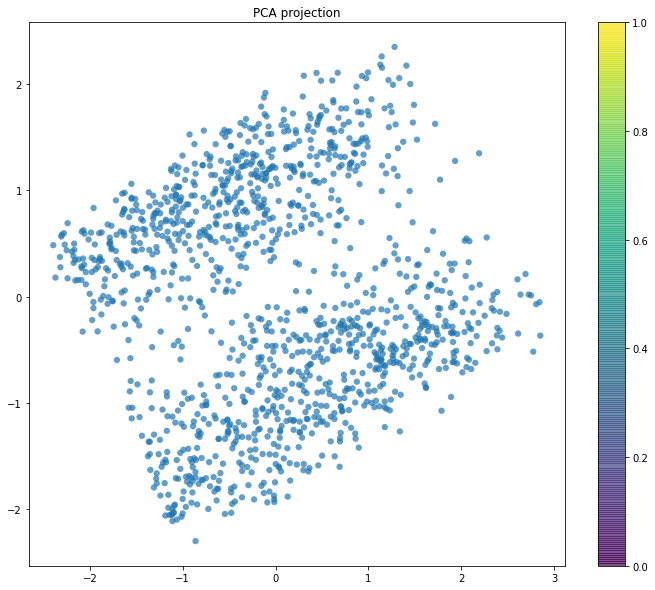

In [117]:
print('Projecting %d-dimensional data to 2D' % data_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('PCA projection');

## **K-Means Algorithm**

**K-Means using PCA features**

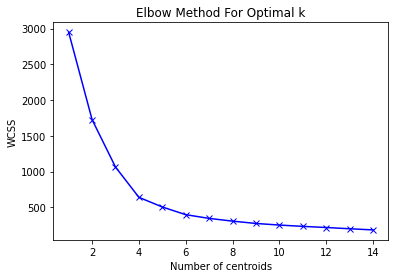

In [118]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(principalDf)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

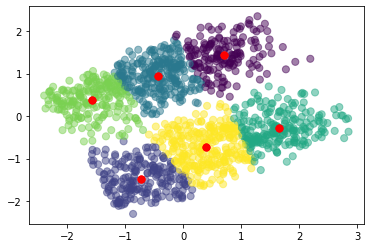

In [122]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(principalDf)
y_kmeans = kmeans.predict(principalDf)
plt.scatter(principalDf[0], principalDf[1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

## **K-Means Algorithm**

**K-Means using Direct Dataset**

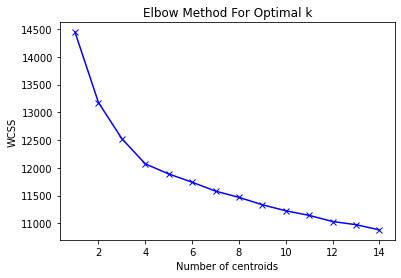

In [108]:
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_scaled)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

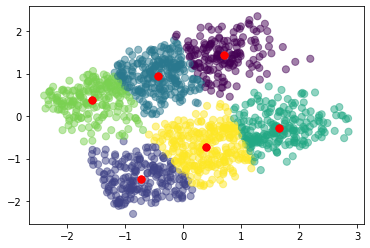

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_scaled)
y_kmeans = kmeans.predict(data_scaled)
plt.scatter(principalDf[0], principalDf[1], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)